In [9]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import numpy as np
import seaborn as sns
import re
from collections import Counter
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Queries.csv'
queries_data = pd.read_csv(file_path)

# Check for null values
null_values = queries_data.isnull().sum()
print("Null values in each column:\n", null_values)

# Get column information
column_info = queries_data.info()

# Get descriptive statistics
descriptive_stats = queries_data.describe()
print("\nDescriptive statistics of the dataset:\n", descriptive_stats)


Null values in each column:
 Top queries    0
Clicks         0
Impressions    0
CTR            0
Position       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Top queries  1000 non-null   object 
 1   Clicks       1000 non-null   int64  
 2   Impressions  1000 non-null   int64  
 3   CTR          1000 non-null   object 
 4   Position     1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB

Descriptive statistics of the dataset:
           Clicks   Impressions     Position
count  1000.0000   1000.000000  1000.000000
mean    172.2750   1939.466000     3.985930
std     281.0221   4856.702605     2.841842
min      48.0000     62.000000     1.000000
25%      64.0000    311.000000     2.010000
50%      94.0000    590.500000     3.120000
75%     169.0000   1582.750000     5.342500
max    5223.0000  

In [10]:
# Convert CTR from percentage string to float
queries_data['CTR'] = queries_data['CTR'].str.replace('%', '').astype(float)

# Display the updated dataset
print(queries_data.head())

                                 Top queries  Clicks  Impressions    CTR  \
0                number guessing game python    5223        14578  35.83   
1                        thecleverprogrammer    2809         3456  81.28   
2           python projects with source code    2077        73380   2.83   
3  classification report in machine learning    2012         4959  40.57   
4                      the clever programmer    1931         2528  76.38   

   Position  
0      1.61  
1      1.02  
2      5.94  
3      1.28  
4      1.09  


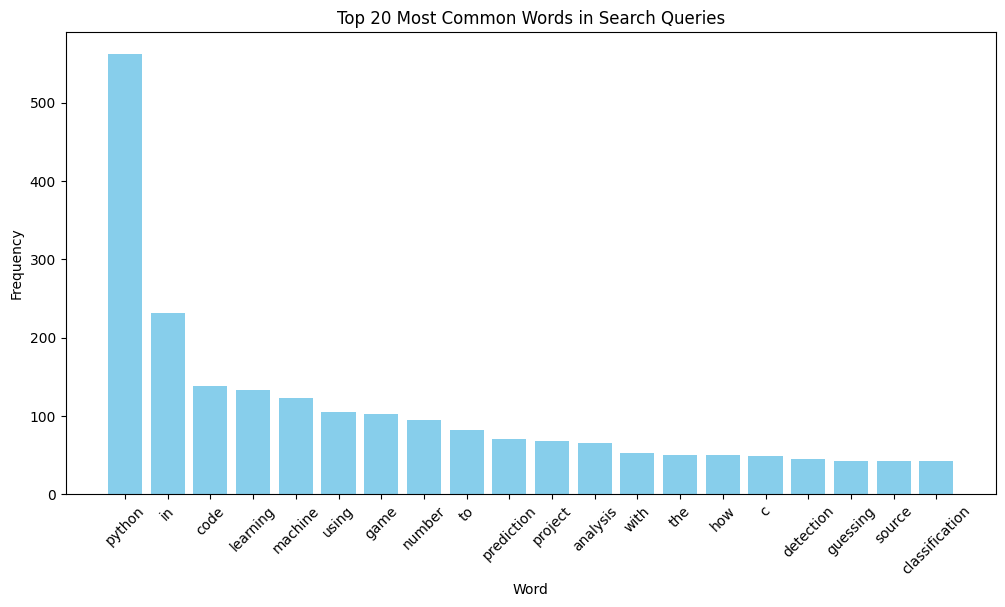

In [11]:
# Function to clean and split the queries into words
def clean_and_split(query):
    # Convert to lower case
    query = query.lower()
    # Remove non-alphanumeric characters
    query = re.sub(r'\W+', ' ', query)
    # Split into words
    words = query.split()
    return words

# Apply the function to each query and get all words
all_words = []
queries_data['Top queries'].apply(lambda x: all_words.extend(clean_and_split(x)))

# Count the frequency of each word
word_freq = Counter(all_words)

# Get the top 20 most common words
common_words = word_freq.most_common(20)

# Prepare data for plotting
words, frequencies = zip(*common_words)

# Plot the word frequencies
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Words in Search Queries')
plt.xticks(rotation=45)
plt.show()


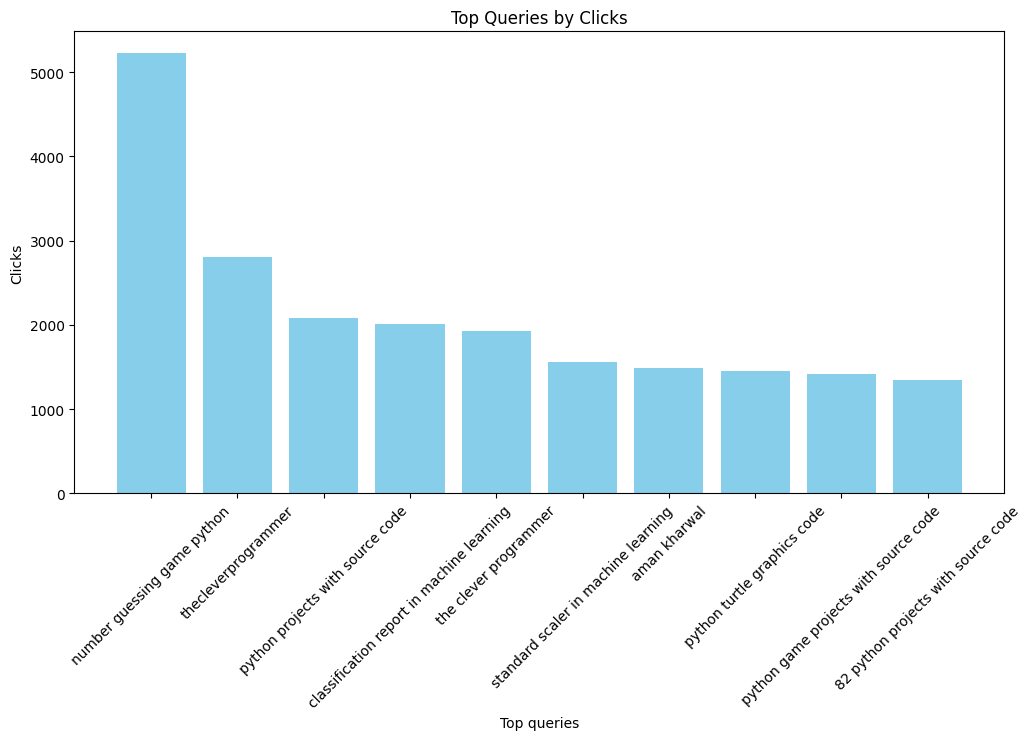

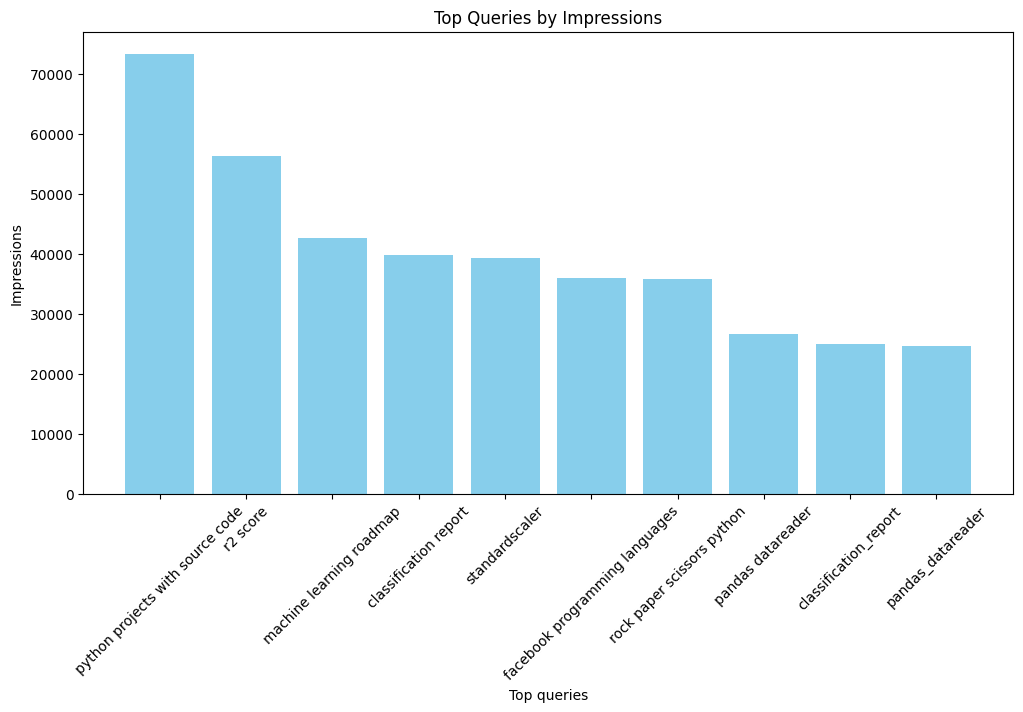

In [12]:

# Identify the top queries by clicks
top_queries_by_clicks = queries_data.nlargest(10, 'Clicks')

# Identify the top queries by impressions
top_queries_by_impressions = queries_data.nlargest(10, 'Impressions')

# Plot the top queries by clicks
plt.figure(figsize=(12, 6))
plt.bar(top_queries_by_clicks['Top queries'], top_queries_by_clicks['Clicks'], color='skyblue')
plt.xlabel('Top queries')
plt.ylabel('Clicks')
plt.title('Top Queries by Clicks')
plt.xticks(rotation=45)
plt.show()

# Plot the top queries by impressions
plt.figure(figsize=(12, 6))
plt.bar(top_queries_by_impressions['Top queries'], top_queries_by_impressions['Impressions'], color='skyblue')
plt.xlabel('Top queries')
plt.ylabel('Impressions')
plt.title('Top Queries by Impressions')
plt.xticks(rotation=45)
plt.show()


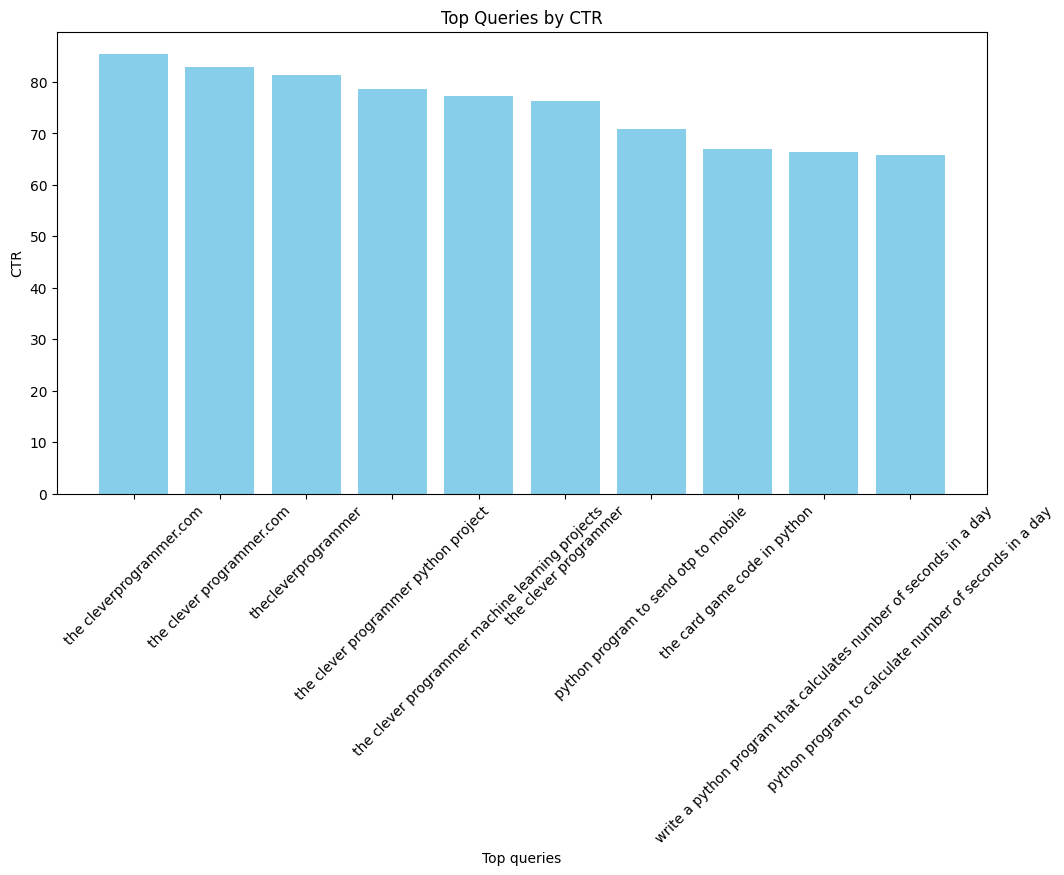

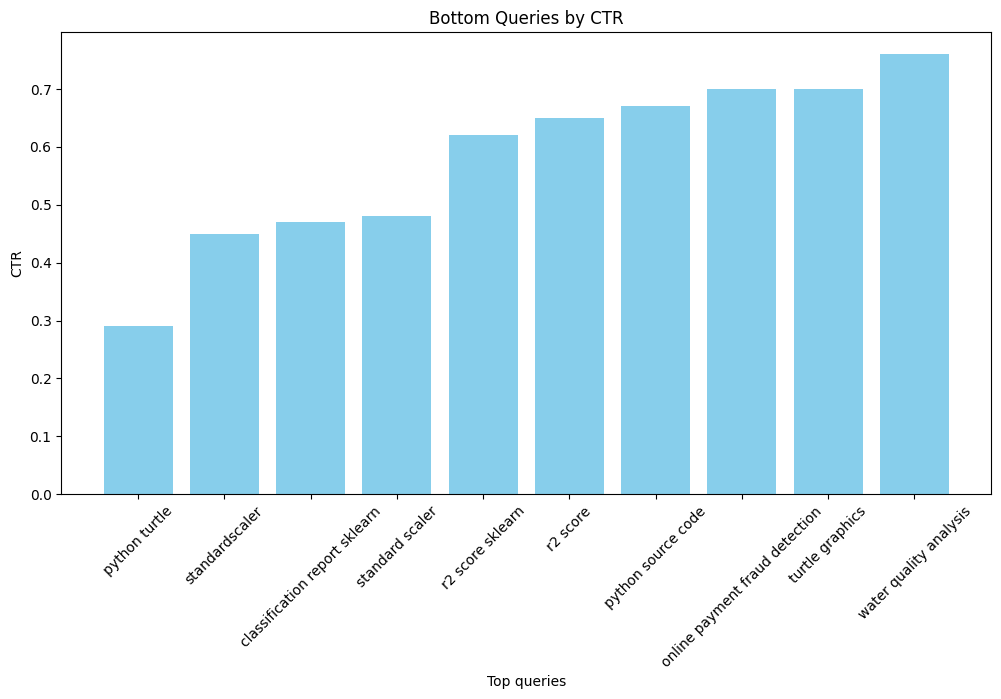

In [13]:

# Identify the top queries by highest CTR
top_queries_by_ctr = queries_data.nlargest(10, 'CTR')

# Identify the bottom queries by lowest CTR
bottom_queries_by_ctr = queries_data.nsmallest(10, 'CTR')

# Plot the top queries by highest CTR
plt.figure(figsize=(12, 6))
plt.bar(top_queries_by_ctr['Top queries'], top_queries_by_ctr['CTR'], color='skyblue')
plt.xlabel('Top queries')
plt.ylabel('CTR')
plt.title('Top Queries by CTR')
plt.xticks(rotation=45)
plt.show()

# Plot the bottom queries by lowest CTR
plt.figure(figsize=(12, 6))
plt.bar(bottom_queries_by_ctr['Top queries'], bottom_queries_by_ctr['CTR'], color='skyblue')
plt.xlabel('Top queries')
plt.ylabel('CTR')
plt.title('Bottom Queries by CTR')
plt.xticks(rotation=45)
plt.show()


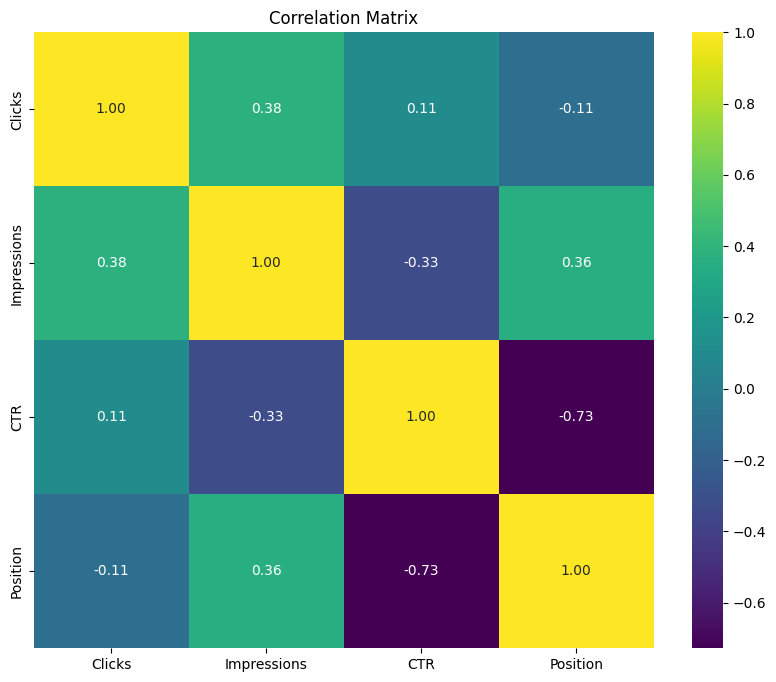

In [14]:
# Calculate the correlation matrix
correlation_matrix = queries_data[['Clicks', 'Impressions', 'CTR', 'Position']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [15]:
# Selecting features for the anomaly detection
features = ['Log_Clicks', 'Log_Impressions', 'Clicks_per_Impression', 'CTR_Deviation', 'Position']

# Create additional features if not already done
queries_data['Log_Clicks'] = np.log1p(queries_data['Clicks'])
queries_data['Log_Impressions'] = np.log1p(queries_data['Impressions'])
queries_data['Clicks_per_Impression'] = queries_data['Clicks'] / queries_data['Impressions']
queries_data['CTR_Deviation'] = queries_data['CTR'] - queries_data['CTR'].mean()

# Initialize the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model
queries_data['Anomaly_Score'] = isolation_forest.fit_predict(queries_data[features])

# Identify anomalies
anomalies = queries_data[queries_data['Anomaly_Score'] == -1]

# Display the anomalies in the specified format
print(anomalies[['Top queries', 'Clicks', 'Impressions', 'CTR', 'Position']])


                                           Top queries  Clicks  Impressions  \
0                          number guessing game python    5223        14578   
1                                  thecleverprogrammer    2809         3456   
2                     python projects with source code    2077        73380   
3            classification report in machine learning    2012         4959   
4                                the clever programmer    1931         2528   
5                  standard scaler in machine learning    1559         7292   
6                                         aman kharwal    1490         5752   
7                          python turtle graphics code    1455        13585   
11                                   clever programmer    1243        21566   
12         car price prediction using machine learning    1200         7072   
13                    aman kharwal data science mentor    1155         2721   
15                          rock paper scissors pyth